Importar librerías

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

# Ejercicio 1

Generar conjuntos de entrenamiento y validación

In [ ]:
np.random.seed(42)
SIZE_TRAIN = 1000
SIZE_TEST = 10000
train_x = np.random.uniform(low=-1, high=1, size=(SIZE_TRAIN, 2))
train_y = np.sign(np.sin(1 / (train_x[:, 0] * train_x[:, 1])))
test_x = np.random.uniform(low=-1, high=1, size=(SIZE_TEST, 2))
test_y = np.sign(np.sin(1 / (test_x[:, 0] * test_x[:, 1])))

Entrenar modelo naive Bayes

In [ ]:
N_POINTS = 10
train_predictions_auc = np.zeros(N_POINTS)
train_predictions_accuracy = np.zeros(N_POINTS)
train_predictions_false_false_positives = np.zeros(N_POINTS)
train_predictions_false_positives = np.zeros(N_POINTS)
test_predictions_auc = np.zeros(N_POINTS)
test_predictions_accuracy = np.zeros(N_POINTS)
test_predictions_false_negatives = np.zeros(N_POINTS)
test_predictions_false_positives = np.zeros(N_POINTS)

for idx, i in enumerate(range(100, 1001, 100)):
  training_set_features = train_x[:i]
  training_set_target = train_y[:i]
  gnb = GaussianNB()
  gnb.fit(training_set_features, training_set_target)
  #calculate metrics for training set
  train_predictions = gnb.predict(training_set_features)
  train_predictions_auc[idx] = roc_auc_score(training_set_target, train_predictions)
  train_predictions_accuracy[idx] = accuracy_score(training_set_target, train_predictions)
  _, train_predictions_false_positives[idx], train_predictions_false_negatives[idx], _  = confusion_matrix(training_set_target, train_predictions).ravel()
  #calculate metrics for test set
  test_predictions = gnb.predict(test_x)
  test_predictions_auc[idx] = roc_auc_score(test_y, test_predictions)
  test_predictions_accuracy[idx] = accuracy_score(test_y, test_predictions)
  _, test_predictions_false_positives[idx], test_predictions_false_negatives[idx], _  = confusion_matrix(test_y, test_predictions).ravel()



Genera gráficas

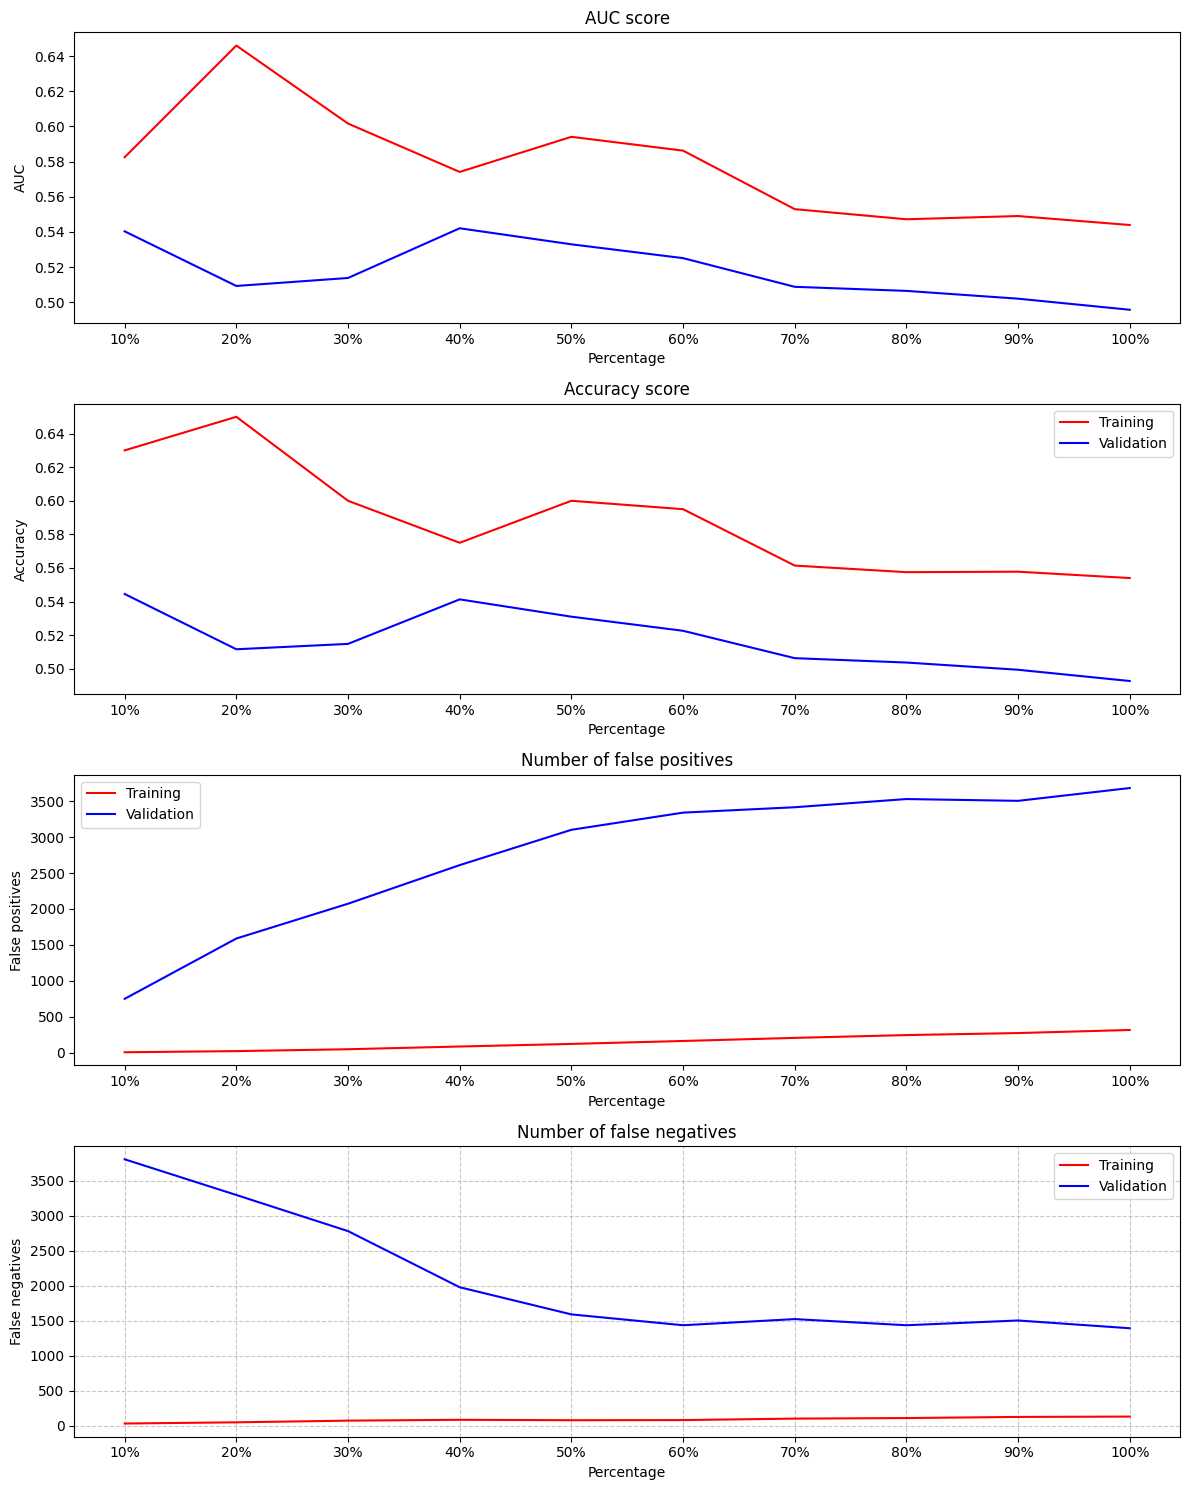

In [ ]:
x = np.linspace(0.1, 1.0, 10)
x_labels = [f'{int(val * 100)}%' for val in x]
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

axes[0].plot(x, train_predictions_auc, label='Training', color='red')
axes[0].plot(x, test_predictions_auc, label='Validation', color='blue')


axes[0].set_xticks(ticks=x, labels=x_labels)
axes[0].set_title('AUC score')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('AUC')

axes[1].plot(x, train_predictions_accuracy, label='Training', color='red')
axes[1].plot(x, test_predictions_accuracy, label='Validation', color='blue')


axes[1].set_xticks(ticks=x, labels=x_labels)
axes[1].set_title('Accuracy score')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[2].plot(x, train_predictions_false_positives, label='Training', color='red')
axes[2].plot(x, test_predictions_false_positives, label='Validation', color='blue')


axes[2].set_xticks(ticks=x, labels=x_labels)
axes[2].set_title('Number of false positives')
axes[2].set_xlabel('Percentage')
axes[2].set_ylabel('False positives')
axes[2].legend()

axes[3].plot(x, train_predictions_false_negatives, label='Training', color='red')
axes[3].plot(x, test_predictions_false_negatives, label='Validation', color='blue')


axes[3].set_xticks(ticks=x, labels=x_labels)
axes[3].set_title('Number of false negatives')
axes[3].set_xlabel('Percentage')
axes[3].set_ylabel('False negatives')
axes[3].legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Εjercicio 2
Se puede ver que el rendimiento del modelo no es bueno. Concretamente, tanto la exactitud como la área bajo la ROC son bajas y no se mejoran cuando se va incremendo el conjunto de entrenamiento. A propósito de los falsos negativos y los falsos positivos, no solo forman un porcentaje significante de los conjuntos de datos sino también no se van disminuyendo cuando se va incrementando el conjunto de entrenamiento.
En términos técnicos tenemos un model con alto sesgo y infraajuste.


# Ejercicio 3

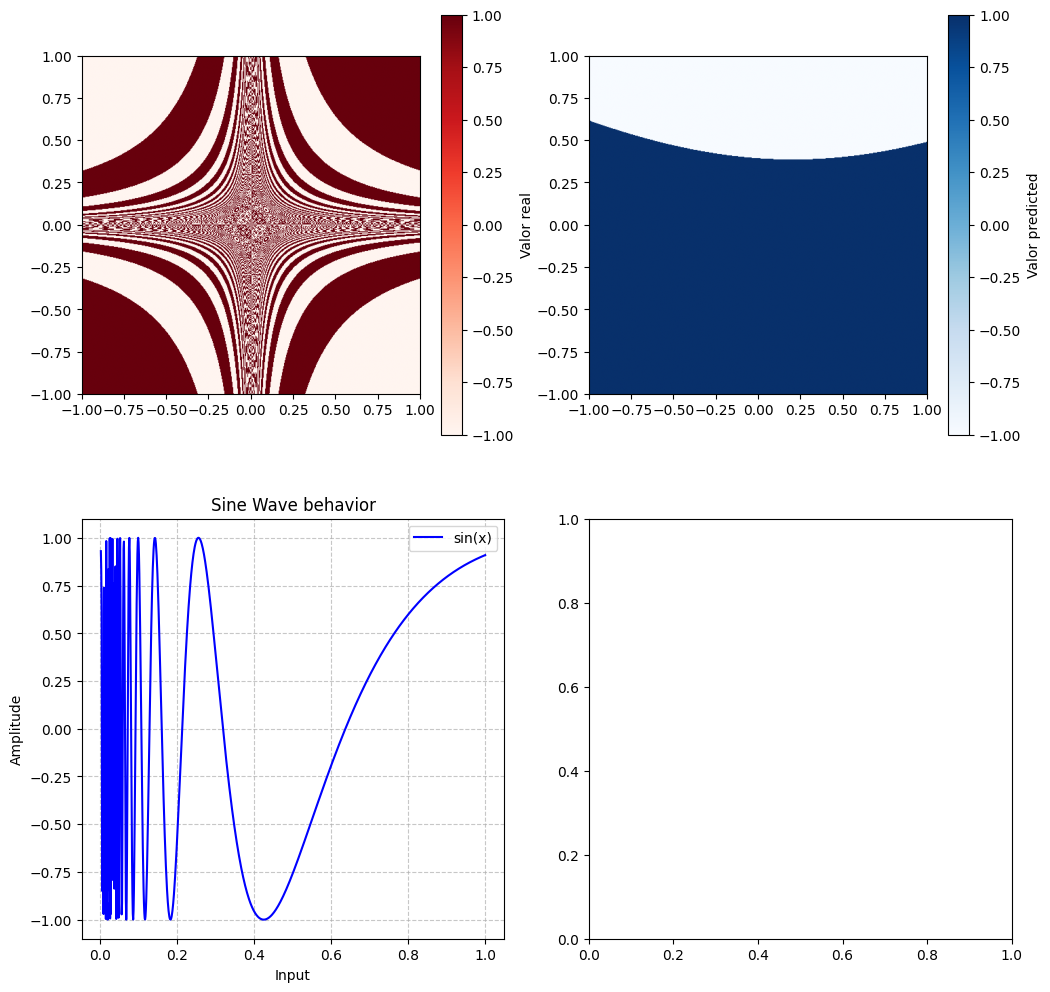

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
xv, yv = np.meshgrid(x, y)
z_real = np.sign(np.sin( 1 / (xv * yv)))
z_predicted = gnb.predict(np.column_stack((xv.ravel(), yv.ravel()))).reshape(500, 500)
plot_extent = (x.min(), x.max(), y.min(), y.max())

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
mappableReal = axes[0][0].imshow(z_real, cmap='Reds', origin='lower', extent=plot_extent)
mappablePredicted = axes[0][1].imshow(z_predicted, cmap='Blues', origin='lower', extent=plot_extent)
plt.colorbar(mappableReal, ax=axes[0][0], label='Valor real')
plt.colorbar(mappablePredicted, ax=axes[0][1], label='Valor predicted')

### Print sin function
x1 = np.linspace(0.001, 1, 1000)
x2 = .5
y = np.sin( 1 / (x1 * x2))
np.shape(y)

axes[1][0].plot(x1, y, label='sin(x)', color='blue')
axes[1][0].set_title('Sine Wave behavior')
axes[1][0].set_xlabel('Input')
axes[1][0].set_ylabel('Amplitude')
axes[1][0].grid(True, linestyle='--', alpha=0.7)
axes[1][0].legend()

plt.show()

plt.tight_layout()

# Ejercicio 4

Ya hemos comentado sobre el rendimiento bajo del modelo. Con estos gráficos podemos también ver la razón. Concretamente, en un clasificador bayes binario y dos rasgos, el borde de decisión es una curva, y aproximar el comportamiento del segno de esta función con cualquier curva es simplemente imposible.

# Ejercicio 5

Para intentar y mejorar el rendimiento del modelo, generaremos nuevos rasgos. Lo haremos añadiendo términos de seno y coseno

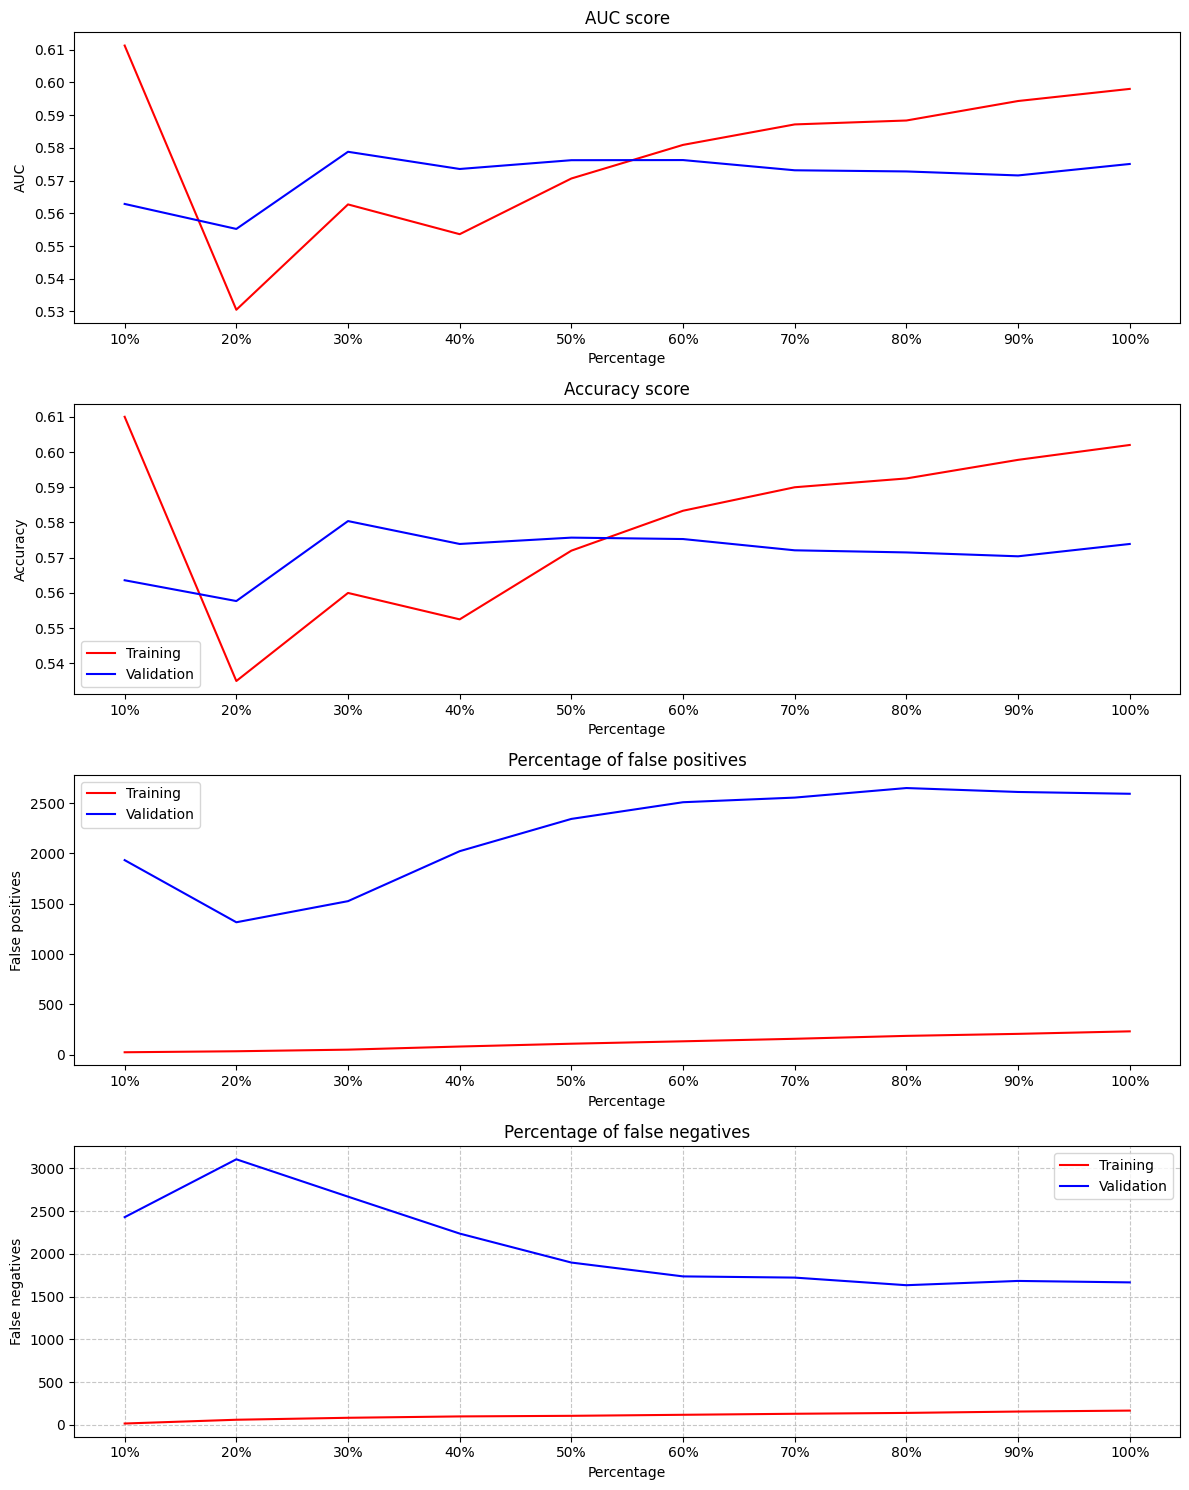

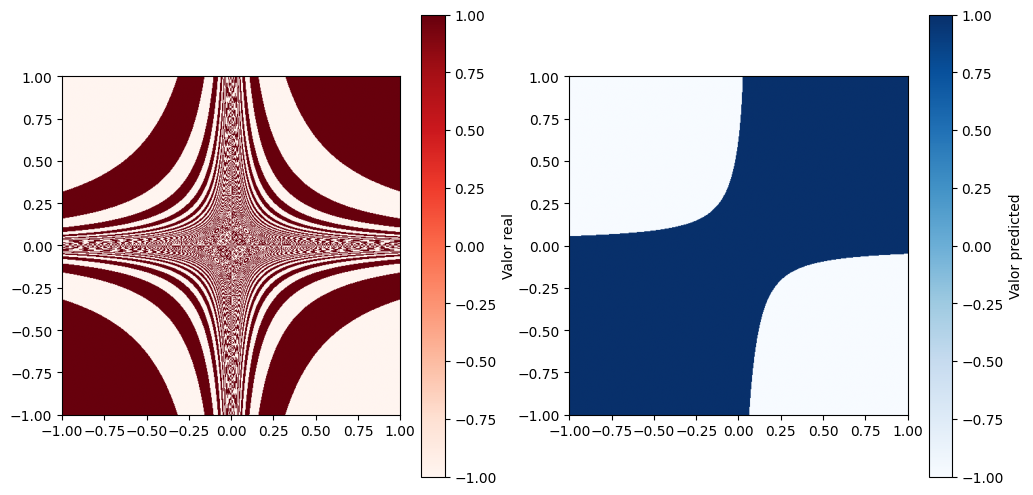

<Figure size 640x480 with 0 Axes>

In [ ]:
train_x_poli = np.vstack(
    (

        (train_x[:, 0] * train_x[:, 1]),
        np.sin(train_x[:, 0]),
        np.sin(train_x[:, 1]),
        np.sin(train_x[:, 0] * train_x[:, 1]),
        np.cos(train_x[:, 0] * train_x[:, 1]),
)).T
test_x_poli = np.vstack(
    (
        (test_x[:, 0] * test_x[:, 1]),
        np.sin(test_x[:, 0]),
        np.sin(test_x[:, 1]),
        np.sin(test_x[:, 0] * test_x[:, 1]),
        np.cos(test_x[:, 0] * test_x[:, 1]),
)).T

N_POINTS = 10
train_predictions_auc = np.zeros(N_POINTS)
train_predictions_accuracy = np.zeros(N_POINTS)
train_predictions_false_negatives = np.zeros(N_POINTS)
train_predictions_false_positives = np.zeros(N_POINTS)
test_predictions_auc = np.zeros(N_POINTS)
test_predictions_accuracy = np.zeros(N_POINTS)
test_predictions_false_negatives = np.zeros(N_POINTS)
test_predictions_false_positives = np.zeros(N_POINTS)

for idx, i in enumerate(range(100, 1001, 100)):
  training_set_features = train_x_poli[:i]
  training_set_target = train_y[:i]
  gnb = GaussianNB()
  gnb.fit(training_set_features, training_set_target)
  #calculate metrics for training set
  train_predictions = gnb.predict(training_set_features)
  train_predictions_auc[idx] = roc_auc_score(training_set_target, train_predictions)
  train_predictions_accuracy[idx] = accuracy_score(training_set_target, train_predictions)
  _, train_predictions_false_positives[idx], train_predictions_false_negatives[idx], _  = confusion_matrix(training_set_target, train_predictions).ravel()
  #calculate metrics for test set
  test_predictions = gnb.predict(test_x_poli)
  test_predictions_auc[idx] = roc_auc_score(test_y, test_predictions)
  test_predictions_accuracy[idx] = accuracy_score(test_y, test_predictions)
  _, test_predictions_false_positives[idx], test_predictions_false_negatives[idx], _  = confusion_matrix(test_y, test_predictions).ravel()

x = np.linspace(0.1, 1.0, 10)
x_labels = [f'{int(val * 100)}%' for val in x]
fig, axes = plt.subplots(4, 1, figsize=(12, 15))

axes[0].plot(x, train_predictions_auc, label='Training', color='red')
axes[0].plot(x, test_predictions_auc, label='Validation', color='blue')


axes[0].set_xticks(ticks=x, labels=x_labels)
axes[0].set_title('AUC score')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('AUC')

axes[1].plot(x, train_predictions_accuracy, label='Training', color='red')
axes[1].plot(x, test_predictions_accuracy, label='Validation', color='blue')


axes[1].set_xticks(ticks=x, labels=x_labels)
axes[1].set_title('Accuracy score')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

axes[2].plot(x, train_predictions_false_positives, label='Training', color='red')
axes[2].plot(x, test_predictions_false_positives, label='Validation', color='blue')


axes[2].set_xticks(ticks=x, labels=x_labels)
axes[2].set_title('Percentage of false positives')
axes[2].set_xlabel('Percentage')
axes[2].set_ylabel('False positives')
axes[2].legend()

axes[3].plot(x, train_predictions_false_negatives, label='Training', color='red')
axes[3].plot(x, test_predictions_false_negatives, label='Validation', color='blue')


axes[3].set_xticks(ticks=x, labels=x_labels)
axes[3].set_title('Percentage of false negatives')
axes[3].set_xlabel('Percentage')
axes[3].set_ylabel('False negatives')
axes[3].legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
xv, yv = np.meshgrid(x, y)
z_real = np.sign(np.sin( 1 / (xv * yv)))
z_predicted = gnb.predict(
    np.column_stack(
            (xv.ravel() * yv.ravel(),
            np.sin(xv.ravel()),
            np.sin(yv.ravel()),
            np.sin(xv.ravel() * yv.ravel()),
            np.cos(xv.ravel() * yv.ravel()))
        )
    ).reshape(500, 500)
plot_extent = (x.min(), x.max(), y.min(), y.max())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
mappableReal = axes[0].imshow(z_real, cmap='Reds', origin='lower', extent=plot_extent)
mappablePredicted = axes[1].imshow(z_predicted, cmap='Blues', origin='lower', extent=plot_extent)
plt.colorbar(mappableReal, ax=axes[0], label='Valor real')
plt.colorbar(mappablePredicted, ax=axes[1], label='Valor predicted')

plt.show()
plt.tight_layout()

Se ve mejoramiento considerable en la exactitud y en el auc. Los falsos positivos se han disminuído notablemente, y el número de los  falsos negativos no ha cambiado mucho.

Además, se ve sobreajuste porque el rendimiento del modelo en el conjunto de entrenamiento es mejor que en el conjunto de test. Por lo tanto, no añadiría más rasgos en el modelo.

En el último gráfico se ve que el modelo predice con éxito el comportamiento de la función cuando el valor absoluto de x y y es cerca de 1 y no consigue hacer lo mismo para valores cerca de los ejes, algo que tiene sentido por el continuo cambio de seno de la función en esta región
